In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load dataset
df = pd.read_csv("cleaned_sales.csv")
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Set style
sns.set(style="whitegrid")

In [41]:
# Basic Data Overview
print("Time Period Covered:", df['date'].min().strftime('%B %Y'), "-", df['date'].max().strftime('%B %Y'))
print("Total Records:", len(df))
print("Revenue Range:", f"\u20B9{df['revenue'].min():,.2f} to \u20B9{df['revenue'].max():,.2f}")
print("Products:", df['product_name'].unique())
print("Platforms:", df['platform'].unique())

Time Period Covered: December 2024 - January 2025
Total Records: 300
Revenue Range: ₹2,693.36 to ₹368,337.94
Products: ['Watch' 'Smartphone' 'Shirt' 'Shoes' 'Jeans']
Platforms: ['Myntra' 'Amazon' 'Ajio' 'Meesho' 'Flipkart']



 PLATFORM PERFORMANCE


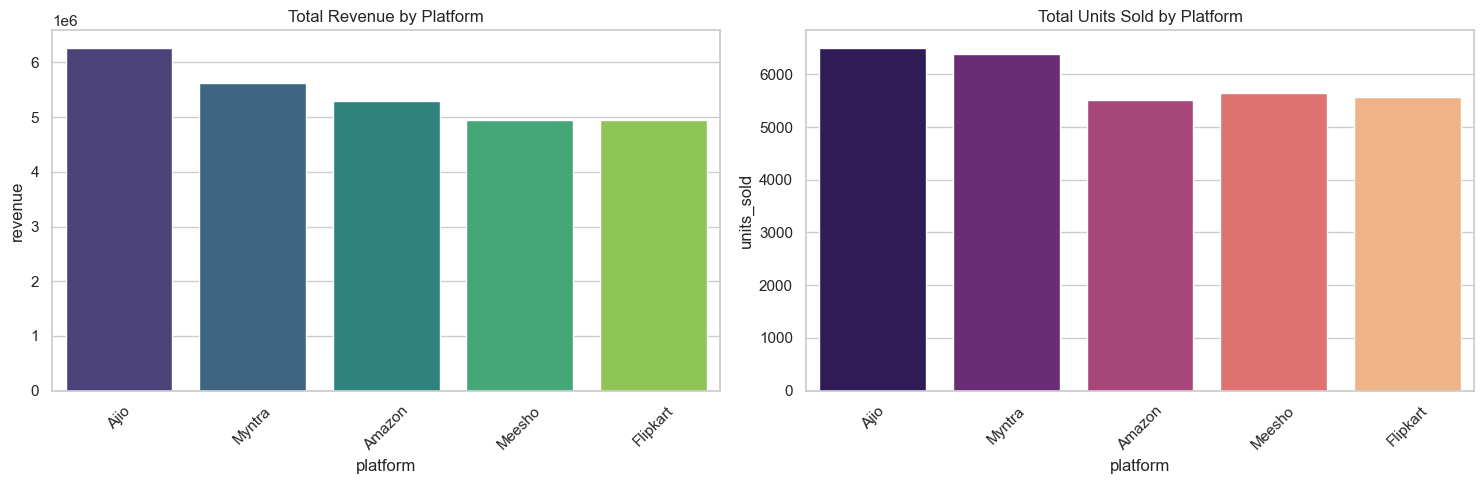

In [29]:
print("\n PLATFORM PERFORMANCE")

plt.figure(figsize=(15, 5))
platform_stats = df.groupby('platform').agg({'revenue':'sum', 'units_sold':'sum'})
platform_stats = platform_stats.sort_values('revenue', ascending=False)
platform_stats = platform_stats.reset_index()  

plt.subplot(1, 2, 1)
sns.barplot(x='platform', y='revenue', data=platform_stats, palette='viridis', hue='platform', legend=False)
plt.title('Total Revenue by Platform')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='platform', y='units_sold', data=platform_stats, palette='magma', hue='platform', legend=False)
plt.title('Total Units Sold by Platform')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Key Metrics Analysis
Total Revenue: ₹ 27093144.63
Average Revenue per Transaction: ₹ 90310.4821


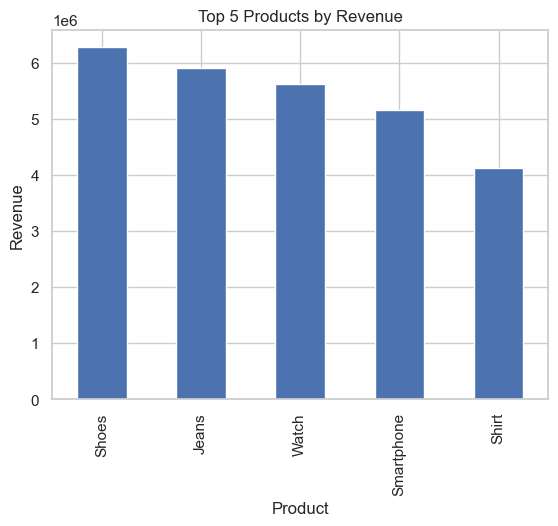

Total Units Sold: 29624
Average Units per Transaction: 98.74666666666667


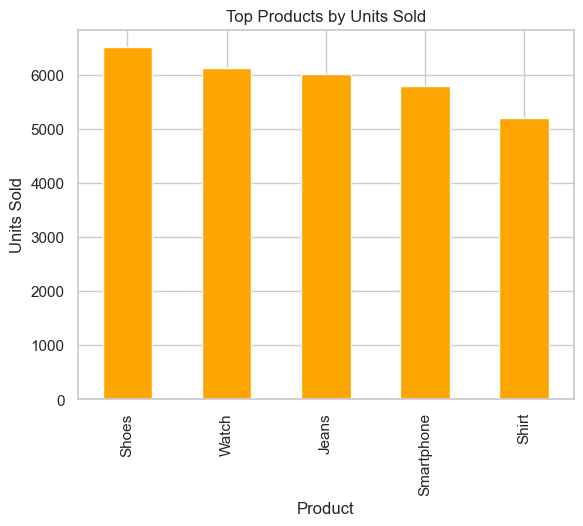

In [37]:
print("\n Key Metrics Analysis")
total_revenue = df['revenue'].sum()
avg_revenue = df['revenue'].mean()
print("Total Revenue: ₹", total_revenue)
print("Average Revenue per Transaction: ₹", avg_revenue)

top_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(5)
top_revenue.plot(kind='bar', title='Top 5 Products by Revenue', ylabel='Revenue', xlabel='Product')
plt.show()

print("Total Units Sold:", df['units_sold'].sum())
print("Average Units per Transaction:", df['units_sold'].mean())

top_units = df.groupby('product_name')['units_sold'].sum().sort_values(ascending=False).head(5)
top_units.plot(kind='bar', title='Top Products by Units Sold', ylabel='Units Sold', xlabel='Product', color='orange')
plt.show()



 Time-Based Analysis


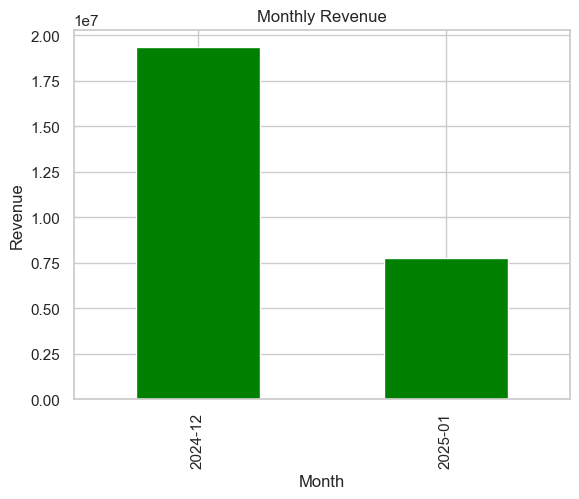

Daily Avg Revenue - December: 91299.21882075472
Daily Avg Revenue - January: 87928.52545454547


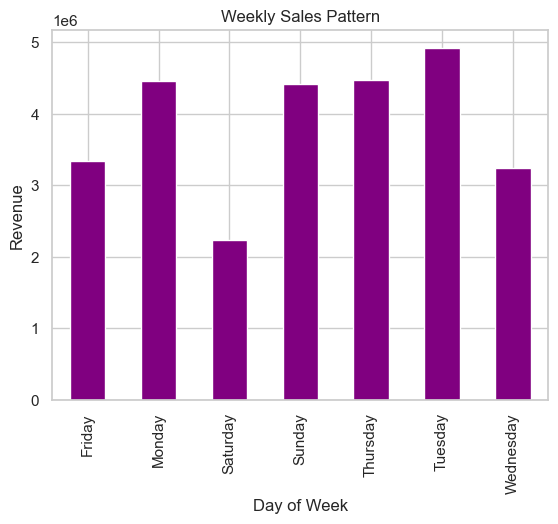

Holiday Impact on Revenue: -15.48%
Revenue on Dec 31: 951318.9400000001


In [35]:
print("\n Time-Based Analysis")
monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['revenue'].sum()
monthly_revenue.plot(kind='bar', title='Monthly Revenue', ylabel='Revenue', xlabel='Month', color='green')
plt.show()

print("Daily Avg Revenue - December:", df[df['date'].dt.month == 12]['revenue'].mean())
print("Daily Avg Revenue - January:", df[df['date'].dt.month == 1]['revenue'].mean())

weekly_revenue = df.groupby('day_of_week')['revenue'].sum()
weekly_revenue.plot(kind='bar', title='Weekly Sales Pattern', ylabel='Revenue', xlabel='Day of Week', color='purple')
plt.show()

holiday_avg = df[df['holiday_flag'] == 1]['revenue'].mean()
non_holiday_avg = df[df['holiday_flag'] == 0]['revenue'].mean()
holiday_impact = ((holiday_avg - non_holiday_avg) / non_holiday_avg) * 100
print("Holiday Impact on Revenue:", f"{holiday_impact:.2f}%")

print("Revenue on Dec 31:", df[df['date'] == '2024-12-31']['revenue'].sum())


 Product Category Analysis


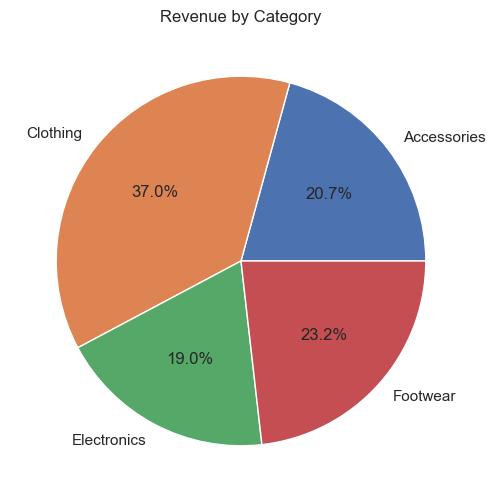

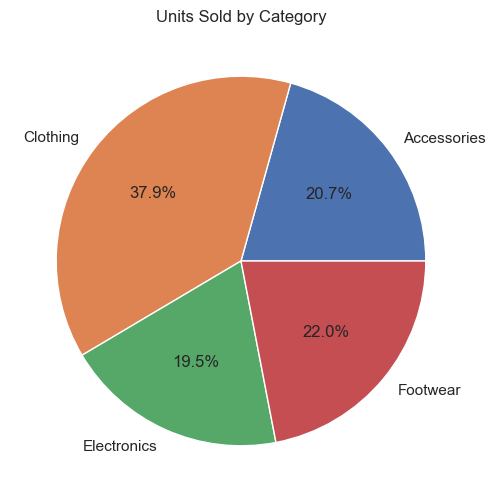


Revenue by Category:
 category
Accessories     5619685.65
Clothing       10033881.96
Electronics     5155528.39
Footwear        6284048.63
Name: revenue, dtype: float64

Units Sold by Category:
 category
Accessories     6121
Clothing       11214
Electronics     5781
Footwear        6508
Name: units_sold, dtype: int64


In [43]:
print("\n Product Category Analysis")
category_rev = df.groupby('category')['revenue'].sum()
category_units = df.groupby('category')['units_sold'].sum()
category_rev.plot(kind='pie', title='Revenue by Category', autopct='%1.1f%%', figsize=(6,6))
plt.ylabel('')
plt.show()

category_units.plot(kind='pie', title='Units Sold by Category', autopct='%1.1f%%', figsize=(6,6))
plt.ylabel('')
plt.show()

print("\nRevenue by Category:\n", category_rev)
print("\nUnits Sold by Category:\n", category_units)



 Regional Performance


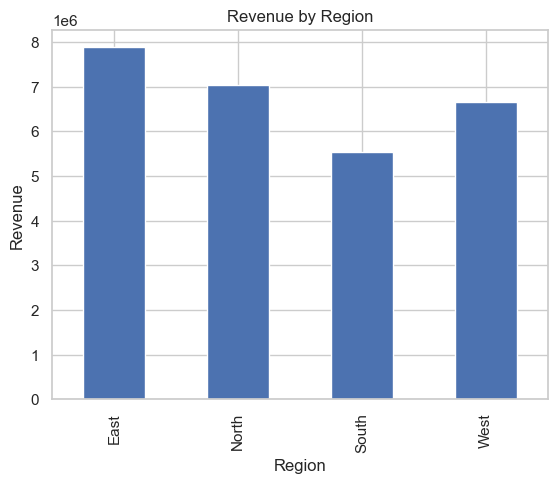


Regional Performance:
         Total_Revenue  % of Total Top Category
region                                        
East       7876028.31   29.070189     Clothing
North      7034105.88   25.962678     Clothing
South      5540130.74   20.448460     Clothing
West       6642879.70   24.518674     Clothing


In [33]:
 print("\n Regional Performance")
region_perf = df.groupby('region').agg(
    Total_Revenue=('revenue', 'sum')
)
region_perf['% of Total'] = (region_perf['Total_Revenue'] / total_revenue) * 100
region_perf['Top Category'] = df.groupby('region')['category'].agg(lambda x: x.value_counts().idxmax())
region_perf['Total_Revenue'].plot(kind='bar', title='Revenue by Region', ylabel='Revenue', xlabel='Region')
plt.show()
print("\nRegional Performance:\n", region_perf)


 PROMOTION IMPACT


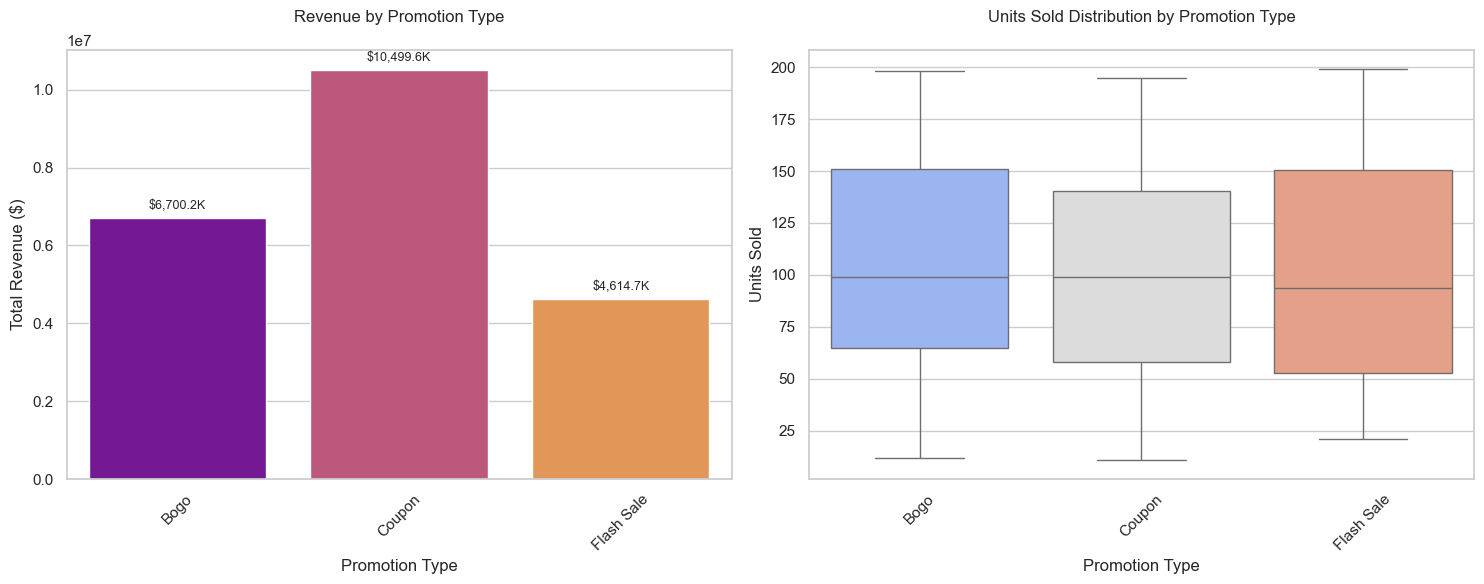

In [31]:
 print("\n PROMOTION IMPACT")
promo_effect = df.groupby('promotion_type').agg({'revenue': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    x='promotion_type', 
    y='revenue', 
    data=promo_effect, 
    hue='promotion_type',  
    palette='plasma',
    legend=False
)
plt.title('Revenue by Promotion Type', pad=20)
plt.ylabel('Total Revenue ($)')
plt.xlabel('Promotion Type')
plt.xticks(rotation=45)

for p in ax1.patches:
    ax1.annotate(f'${p.get_height()/1000:,.1f}K', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=9)
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(
    x='promotion_type', 
    y='units_sold', 
    data=df, 
    hue='promotion_type',  
    palette='coolwarm',
    legend=False,
    showfliers=False  
)
plt.title('Units Sold Distribution by Promotion Type', pad=20)
plt.ylabel('Units Sold')
plt.xlabel('Promotion Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [21]:
#  Customer Behavior
print("\nAverage Customer Rating:", df['customer_rating'].mean())
print("Return Rate (avg):", df['return_rate'].mean())
print("Highest Return Rate (Category):", df.groupby('category')['return_rate'].mean().idxmax())
print("Lowest Return Rate (Category):", df.groupby('category')['return_rate'].mean().idxmin())
repeat_customers = df['customer_name'].value_counts()
print("Repeat Customers (%):", (repeat_customers[repeat_customers > 1].count() / len(df)) * 100)


Average Customer Rating: 2.98
Return Rate (avg): 0.10363333333333334
Highest Return Rate (Category): Electronics
Lowest Return Rate (Category): Accessories
Repeat Customers (%): 3.3333333333333335


In [23]:
#  Inventory & Stock Analysis
print("\nAverage Stock Available:", df['stock_available'].mean())
print("Sales Velocity - Low Stock (<50):", df[df['stock_available'] < 50]['units_sold'].mean())
print("Sales Velocity - High Stock (>400):", df[df['stock_available'] > 400]['units_sold'].mean())


Average Stock Available: 256.79333333333335
Sales Velocity - Low Stock (<50): 80.92592592592592
Sales Velocity - High Stock (>400): 92.36986301369863



Average Marketing Spend per Transaction: 2602.831333333333


C:\Users\samee\AppData\Local\Temp\ipykernel_6996\82303275.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  roi_by_category = df.groupby('category').apply(lambda x: x['revenue'].sum() / x['marketing_spend'].sum())


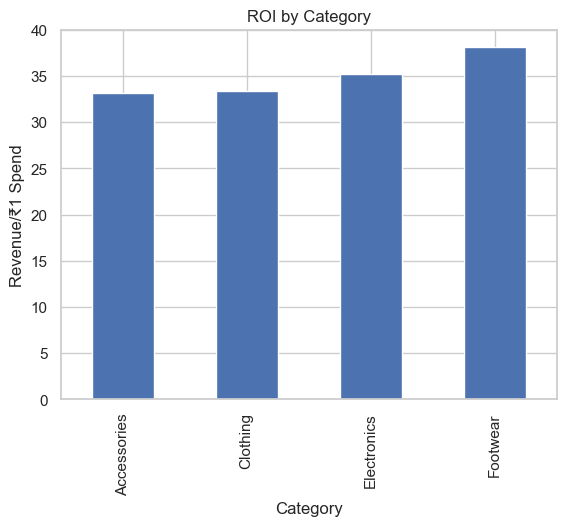

ROI by Category:
 category
Accessories    33.205671
Clothing       33.401364
Electronics    35.240985
Footwear       38.105057
dtype: float64

Most Effective Promotions:
promotion_type
Coupon        111
Bogo           73
Flash Sale     52
Name: count, dtype: int64


In [25]:
#  Marketing Spend Analysis
print("\nAverage Marketing Spend per Transaction:", df['marketing_spend'].mean())
roi_by_category = df.groupby('category').apply(lambda x: x['revenue'].sum() / x['marketing_spend'].sum())
roi_by_category.plot(kind='bar', title='ROI by Category', ylabel='Revenue/₹1 Spend', xlabel='Category')
plt.show()
print("ROI by Category:\n", roi_by_category)
print("\nMost Effective Promotions:")
print(df['promotion_type'].value_counts())

In [27]:
#  Sentiment Analysis
print("\nAverage Sentiment Score:", df['sentiment_score'].mean())
print("Positive Sentiment Sales Impact:", df[df['sentiment_score'] > 0]['revenue'].mean())
print("Negative Sentiment Sales Impact:", df[df['sentiment_score'] < 0]['revenue'].mean())


Average Sentiment Score: 0.0044
Positive Sentiment Sales Impact: 87672.26377622377
Negative Sentiment Sales Impact: 92713.4452866242
